In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

companies_csv = 'Bankrupt_companies.csv'

c_dataset = pd.read_csv(companies_csv)

In [3]:
c_dataset.head(300)
# Create an histogram of companies based on their Assets. First data cleaning is necessary 

,Company,Industry,Bankruptcy Date,Assets ($)
0,Hertz,"Travel, Lodging and Leisure",22-May,25.8B
1,Latam Airlines,"Travel, Lodging and Leisure",25-May,21.1B
2,Frontier Communications,"Telecoms, Media and Technology",14-Apr,17.4B
3,Chesapeake Energy,Energy,28-Jun,16.2B
4,Ascena Retail,Retail and Restaurants,23-Jul,13.7B
...,...,...,...,...
295,Ed’s Beans,Retail and Restaurants,19-Oct,100.0K
296,Street Level,Other,19-Oct,100.0K
297,Yang’s Fitness & Training Center,"Travel, Lodging and Leisure",19-Oct,100.0K
298,Natty Greene’s Brewing Co.,Retail and Restaurants,18-Oct,100.0K


In [4]:
assets = c_dataset['Assets ($)']
as_number = []
for number in assets:
    number_list = list(number)
    if number_list[-1] == 'B':
        x = 1000000000
    elif number_list[-1] == 'M':
        x = 1000000
    elif number_list[-1] == 'K':
        x = 1000
    number_list.pop()
    x_number =''.join(number_list)
    new_number = round(float(x_number)*x,2)
    as_number.append(new_number)
c_dataset['Assets number']=as_number
display(c_dataset.head(15))


,Company,Industry,Bankruptcy Date,Assets ($),Assets number
0,Hertz,"Travel, Lodging and Leisure",22-May,25.8B,2.580000e+10
1,Latam Airlines,"Travel, Lodging and Leisure",25-May,21.1B,2.110000e+10
2,Frontier Communications,"Telecoms, Media and Technology",14-Apr,17.4B,1.740000e+10
3,Chesapeake Energy,Energy,28-Jun,16.2B,1.620000e+10
4,Ascena Retail,Retail and Restaurants,23-Jul,13.7B,1.370000e+10
5,Valaris,Energy,19-Aug,13.0B,1.300000e+10
6,Mallinckrodt,Health and Personal Care,12-Oct,9.6B,9.600000e+09
7,J.C. Penney,Retail and Restaurants,15-May,8.6B,8.600000e+09
8,Whiting Petroleum,Energy,1-Apr,7.6B,7.600000e+09
9,Avianca Holdings,"Travel, Lodging and Leisure",10-May,7.3B,7.300000e+09


Industry
Retail and Restaurants                         123
Travel, Lodging and Leisure                     54
Energy                                          54
Other                                           42
Industrials, Materials, Equipment and Parts     26
Health and Personal Care                        26
Entertainment                                   16
Telecoms, Media and Technology                   6
Name: Company, dtype: int64

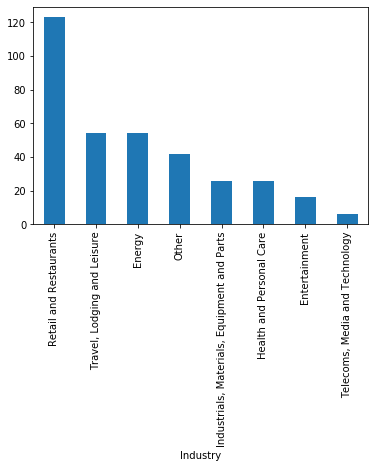

In [5]:
# Grouping data by industry to display most affected industry counting companies
g_data = c_dataset.groupby('Industry')
count_ind = g_data['Company'].count().sort_values(ascending = False)
display(count_ind)

# Plotting outcome of the industries
count_ind.plot(kind="bar")

# Proposed: Plot Assets by industry

Industry
Energy                                         8.874120e+10
Travel, Lodging and Leisure                    5.835820e+10
Retail and Restaurants                         4.158027e+10
Telecoms, Media and Technology                 1.963150e+10
Health and Personal Care                       1.093800e+10
Industrials, Materials, Equipment and Parts    9.042850e+09
Other                                          5.766530e+09
Entertainment                                  1.852500e+08
Name: Assets number, dtype: float64

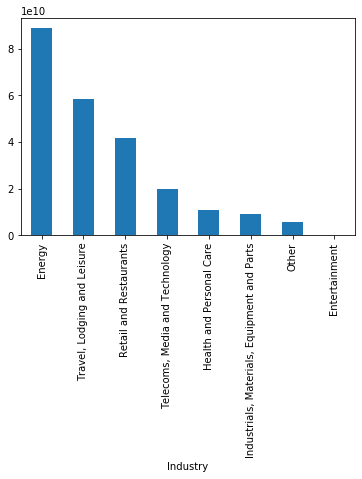

In [6]:
sum_assets = g_data['Assets number'].sum().sort_values(ascending = False)
display(sum_assets)
# Plotting outcome of the industries
sum_assets.plot(kind="bar")

In [7]:
count_ind

Industry
Retail and Restaurants                         123
Travel, Lodging and Leisure                     54
Energy                                          54
Other                                           42
Industrials, Materials, Equipment and Parts     26
Health and Personal Care                        26
Entertainment                                   16
Telecoms, Media and Technology                   6
Name: Company, dtype: int64

In [8]:
count_df = pd.DataFrame(count_ind)
count_df['Share of Industry'] = round((count_df['Company']/(count_df['Company'].sum()))*100,2)
count_df

,Company,Share of Industry
Industry,,
Retail and Restaurants,123,35.45
"Travel, Lodging and Leisure",54,15.56
Energy,54,15.56
Other,42,12.10
"Industrials, Materials, Equipment and Parts",26,7.49
Health and Personal Care,26,7.49
Entertainment,16,4.61
"Telecoms, Media and Technology",6,1.73


In [9]:
# Time series of industries that bankrupted
year_date = []

for date in c_dataset['Bankruptcy Date']:
    #print(date)
    new_date = date.split('-')
    new_date.append('2020')
    final = "-".join(new_date)
    year_date.append(final)


# Setting data as date to sort  
c_dataset['Bankruptcy Date'] = year_date
c_dataset['Bankruptcy Date'] = pd.to_datetime(c_dataset['Bankruptcy Date'])
data_sorted = c_dataset.sort_values(by='Bankruptcy Date')

# Extracting month from the date

new_month = []
for month in data_sorted['Bankruptcy Date']:
    new_month.append(month.month)

# Adding month as a new column

data_sorted['Month'] = new_month
display(data_sorted)



,Company,Industry,Bankruptcy Date,Assets ($),Assets number,Month
49,Foresight Energy,Energy,2020-03-10,1.0B,1.000000e+09,3
345,Joffe Emergency Services,Other,2020-03-12,50.0K,5.000000e+04,3
263,Miami Air International,"Travel, Lodging and Leisure",2020-03-24,1.0M,1.000000e+06,3
181,Alaska Urological Institute,Health and Personal Care,2020-03-25,10.0M,1.000000e+07,3
284,Woods Sealing & Striping,"Industrials, Materials, Equipment and Parts",2020-03-26,0.5M,5.000000e+05,3
...,...,...,...,...,...,...
316,Black Sea Fish and Grill,Retail and Restaurants,2020-12-16,50.0K,5.000000e+04,12
113,Tillary Hotel,"Travel, Lodging and Leisure",2020-12-18,50.0M,5.000000e+07,12
112,Renovate America,Other,2020-12-21,50.0M,5.000000e+07,12
136,Punch Bowl Social,Retail and Restaurants,2020-12-21,10.0M,1.000000e+07,12


Month
3      8
4     30
5     36
6     42
7     58
8     43
9     48
10    47
11    17
12    18
Name: Company, dtype: int64

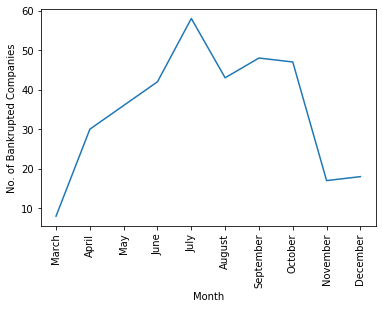

In [10]:

month_data = data_sorted.groupby('Month')
company_month = month_data['Company'].count()
display(company_month)

x_labels = 'March April May June July August September October November December'.split(" ")
plt.plot(x_labels,company_month)
plt.xticks(x_labels, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('No. of Bankrupted Companies')
plt.show()


In [11]:
data_sorted

,Company,Industry,Bankruptcy Date,Assets ($),Assets number,Month
49,Foresight Energy,Energy,2020-03-10,1.0B,1.000000e+09,3
345,Joffe Emergency Services,Other,2020-03-12,50.0K,5.000000e+04,3
263,Miami Air International,"Travel, Lodging and Leisure",2020-03-24,1.0M,1.000000e+06,3
181,Alaska Urological Institute,Health and Personal Care,2020-03-25,10.0M,1.000000e+07,3
284,Woods Sealing & Striping,"Industrials, Materials, Equipment and Parts",2020-03-26,0.5M,5.000000e+05,3
...,...,...,...,...,...,...
316,Black Sea Fish and Grill,Retail and Restaurants,2020-12-16,50.0K,5.000000e+04,12
113,Tillary Hotel,"Travel, Lodging and Leisure",2020-12-18,50.0M,5.000000e+07,12
112,Renovate America,Other,2020-12-21,50.0M,5.000000e+07,12
136,Punch Bowl Social,Retail and Restaurants,2020-12-21,10.0M,1.000000e+07,12


In [111]:
from sklearn.preprocessing import OneHotEncoder

date_industry = data_sorted[['Month','Industry']]
month_industry = date_industry.set_index('Month')
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(date_industry)
enc.categories_


[array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
 array(['Energy', 'Entertainment', 'Health and Personal Care',
        'Industrials, Materials, Equipment and Parts', 'Other',
        'Retail and Restaurants', 'Telecoms, Media and Technology',
        'Travel, Lodging and Leisure'], dtype=object)]

In [ ]:
fit()

In [25]:
industries = list(month_industry['Industry'].unique())
industries

['Energy',
 'Other',
 'Travel, Lodging and Leisure',
 'Health and Personal Care',
 'Industrials, Materials, Equipment and Parts',
 'Telecoms, Media and Technology',
 'Retail and Restaurants',
 'Entertainment']

In [40]:
months_2 = '1 2 3 4 5 6 7 8 9 10 11 12'.split()
display(months_2)
for month in iterrows(date_industry):
    if month[0]
    


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']